# Electric Vehicle Charging Stations

##### Intent:
- The intent for this notebook is to clean the CVS files acquired through the data.gov (EPA's) website so that they only show the EV charging locations for 2012 and 2021. I will then pass the data to Tableau to visualize on a map the change in the number of charging stations from 2012 to 2021. 
- I will also look to see if I can find any other interesting information along the way...

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

## 2012 EV Charging Station Data

In [2]:
# Bring in 2012 info
ev_12 = pd.read_csv("alternative-fuel-stations-2012-csv-1.csv")

In [3]:
# 2012 Data
ev_12.head(2)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID
0,CNG,Alagasco Tuscaloosa Operations Center,5220 Metro Park Dr,NaN,Tuscaloosa,AL,35405,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,200-8,33.161768,-87.556760,2011-08-31,14
1,CNG,Alagasco Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,200-8,32.367163,-86.267396,2011-08-31,17


In [4]:
ev_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10458 entries, 0 to 10457
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           10458 non-null  object 
 1   Station Name             10458 non-null  object 
 2   Street Address           10421 non-null  object 
 3   Intersection Directions  4242 non-null   object 
 4   City                     10458 non-null  object 
 5   State                    10458 non-null  object 
 6   ZIP                      10458 non-null  int64  
 7   Plus4                    1641 non-null   float64
 8   Station Phone            8784 non-null   object 
 9   Status Code              10458 non-null  object 
 10  Expected Date            434 non-null    object 
 11  Groups With Access Code  10458 non-null  object 
 12  Access Days Time         9034 non-null   object 
 13  Cards Accepted           5605 non-null   object 
 14  BD Blends             

In [5]:
ev_12['Fuel Type Code'].value_counts()

ELEC    3314
LPG     2681
E85     2536
CNG     1070
BD       655
LNG      146
HY        56
Name: Fuel Type Code, dtype: int64

In [6]:
# Selecting only ev charging stations
ev_12 = ev_12[ev_12['Fuel Type Code'] == 'ELEC']
ev_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3314 entries, 305 to 10457
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           3314 non-null   object 
 1   Station Name             3314 non-null   object 
 2   Street Address           3313 non-null   object 
 3   Intersection Directions  1378 non-null   object 
 4   City                     3314 non-null   object 
 5   State                    3314 non-null   object 
 6   ZIP                      3314 non-null   int64  
 7   Plus4                    59 non-null     float64
 8   Station Phone            2966 non-null   object 
 9   Status Code              3314 non-null   object 
 10  Expected Date            177 non-null    object 
 11  Groups With Access Code  3314 non-null   object 
 12  Access Days Time         2951 non-null   object 
 13  Cards Accepted           48 non-null     object 
 14  BD Blends            

In [7]:
# Drop columns with mostly nulls
# Threshold is 40 so that I do not drop 'EV DC Fast Count'
ev_12 = ev_12.dropna(axis=1, thresh=40)
ev_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3314 entries, 305 to 10457
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           3314 non-null   object 
 1   Station Name             3314 non-null   object 
 2   Street Address           3313 non-null   object 
 3   Intersection Directions  1378 non-null   object 
 4   City                     3314 non-null   object 
 5   State                    3314 non-null   object 
 6   ZIP                      3314 non-null   int64  
 7   Plus4                    59 non-null     float64
 8   Station Phone            2966 non-null   object 
 9   Status Code              3314 non-null   object 
 10  Expected Date            177 non-null    object 
 11  Groups With Access Code  3314 non-null   object 
 12  Access Days Time         2951 non-null   object 
 13  Cards Accepted           48 non-null     object 
 14  EV Level1 EVSE Num   

In [8]:
colums_to_drop = ['Intersection Directions', 'Plus4', 'Station Phone', 
                  'Expected Date', 'Access Days Time', 'Cards Accepted']
ev_12 = ev_12.drop(columns=colums_to_drop)
ev_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3314 entries, 305 to 10457
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           3314 non-null   object 
 1   Station Name             3314 non-null   object 
 2   Street Address           3313 non-null   object 
 3   City                     3314 non-null   object 
 4   State                    3314 non-null   object 
 5   ZIP                      3314 non-null   int64  
 6   Status Code              3314 non-null   object 
 7   Groups With Access Code  3314 non-null   object 
 8   EV Level1 EVSE Num       1286 non-null   float64
 9   EV Level2 EVSE Num       2826 non-null   float64
 10  EV DC Fast Count         45 non-null     float64
 11  EV Other Info            316 non-null    object 
 12  EV Network               1891 non-null   object 
 13  EV Network Web           1881 non-null   object 
 14  Geocode Status       

In [9]:
# Melt EV names to better visualize plot below of the different types of stations

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

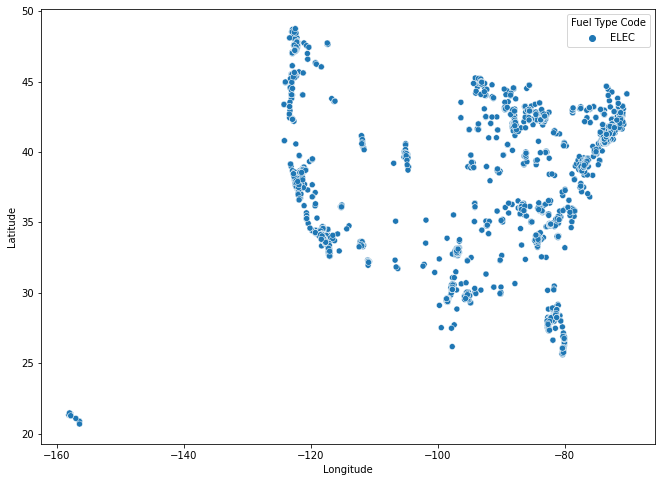

In [33]:
f, ax = plt.subplots(figsize=(11, 8))
sns.scatterplot(x="Longitude", y="Latitude",
                hue="Fuel Type Code", 
                palette="tab10",
                data=ev_12)

## 2021 EV Charging Station Data

In [11]:
# Bring in 2021 data:
ev_21 = pd.read_csv("alternative-fuel-stations-2021-csv-3.csv")

In [12]:
# 2021 Data
ev_21.head(2)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,NaN


In [13]:
ev_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56800 entries, 0 to 56799
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    56800 non-null  object 
 1   Station Name                      56800 non-null  object 
 2   Street Address                    56798 non-null  object 
 3   Intersection Directions           4827 non-null   object 
 4   City                              56800 non-null  object 
 5   State                             56800 non-null  object 
 6   ZIP                               56800 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     52437 non-null  object 
 9   Status Code                       56800 non-null  object 
 10  Expected Date                     376 non-null    object 
 11  Groups With Access Code           56800 non-null  object 
 12  Acce

In [14]:
ev_21['Fuel Type Code'].value_counts()

ELEC    47086
E85      4233
LPG      2893
CNG      1569
BD        726
LNG       150
HY        143
Name: Fuel Type Code, dtype: int64

In [15]:
ev_21 = ev_21[ev_21['Fuel Type Code'] == 'ELEC']

In [16]:
ev_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47086 entries, 159 to 56793
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    47086 non-null  object 
 1   Station Name                      47086 non-null  object 
 2   Street Address                    47086 non-null  object 
 3   Intersection Directions           2340 non-null   object 
 4   City                              47086 non-null  object 
 5   State                             47086 non-null  object 
 6   ZIP                               47086 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     44367 non-null  object 
 9   Status Code                       47086 non-null  object 
 10  Expected Date                     155 non-null    object 
 11  Groups With Access Code           47086 non-null  object 
 12  Ac

In [17]:
ev_21['EV Other Info'].value_counts()

1 SP Inductive                                                            20
1 LP Inductive                                                             4
2 Conductive 240V                                                          1
7 Conductive 120V                                                          1
2 Tesla Conductive                                                         1
1 SP Inductive  1 Tesla Conductive                                         1
6 Conductive 120V/240V NEMA 14-50                                          1
1 Conductive 120V                                                          1
1 LP Inductive  1 SP Inductive  1 Avcon Conductive  1 Other Conductive     1
2 SP Inductive  1 Avcon Conductive  1 Tesla Conductive                     1
3 SP Inductive                                                             1
2 Conductive 120V  1 Conductive 240V                                       1
2 SP Inductive                                                             1

In [18]:
pd.set_option("display.max_columns", None)
ev_21[ev_21['EV Other Info'] != 'NaN']

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
159,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,NaN,Private,Fleet use only,NaN,NaN,NaN,NaN,NaN,39.0,3.0,NaN,Non-Networked,NaN,GPS,34.248319,-118.387971,2021-07-14,1517,2021-07-14 18:51:43 UTC,LG,NaN,NaN,1999-10-15,NaN,NaN,NaN,NaN,CHADEMO J1772 J1772COMBO,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,UTILITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Non-Networked,NaN,200-8,34.052542,-118.448504,2021-07-14,1519,2021-07-14 18:51:43 UTC,LG,NaN,NaN,2020-02-28,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,UTILITY,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,ELEC,Southern California Edison - Rosemead Office B...,2244 Walnut Grove Ave,NaN,Rosemead,CA,91770,NaN,NaN,T,2021-06-01,TEMPORARILY UNAVAILABLE (Private),Employee use only,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,Greenlots,http://greenlots.com/,200-9,34.050745,-118.081014,2021-01-14,1520,2021-03-11 23:22:17 UTC,T,NaN,NaN,2011-08-01,NaN,NaN,NaN,NaN,J1772 NEMA520,US,NaN,NaN,NaN,TEMPORAIREMENT SUSPENDU (Privé),NaN,private,NaN,NaN,UTILITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,NaN,Public,24 hours daily; pay lot,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,Non-Networked,NaN,GPS,34.040539,-118.271387,2020-11-09,1523,2021-03-11 23:22:17 UTC,P,NaN,NaN,1995-08-30,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,PARKING_GARAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,NaN,Private,For fleet and employee use only,NaN,NaN,NaN,NaN,NaN,311.0,2.0,NaN,Non-Networked,NaN,GPS,34.059133,-118.248589,2021-07-14,1525,2021-07-14 18:51:43 UTC,LG,NaN,NaN,1999-10-15,NaN,NaN,NaN,NaN,CHADEMO J1772 J1772COMBO,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,UTILITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56789,ELEC,SWEC_ SWEC2,6800 RT 162,NaN,Maryville,IL,62062,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,http://www.chargepoint.com/,GPS,38.737390,-89.945820,2021-07-29,193297,2021-07-29 00:26:39 UTC,NaN,NaN,NaN,2021-07-29,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56790,ELEC,Calabasas Rondell Smart Park,23600 Rondell S

In [19]:
ev_21['EV DC Fast Count'].value_counts()

1.0     2670
2.0      714
4.0      602
8.0      586
6.0      202
3.0      164
12.0     147
10.0     130
16.0      54
20.0      31
14.0      30
5.0       16
24.0      14
18.0      12
7.0        8
9.0        4
11.0       3
19.0       3
40.0       3
21.0       2
26.0       2
22.0       2
32.0       2
13.0       2
28.0       2
35.0       1
17.0       1
34.0       1
44.0       1
56.0       1
Name: EV DC Fast Count, dtype: int64

In [20]:
ev_21 = ev_21[ev_21['Fuel Type Code'] == 'ELEC']

In [21]:
# Drop columns that mostly have nulls
# Thresh of 1000 was chosen because I wanted to keep the 'EV Level1 EVSE Num' column
ev_21 = ev_21.dropna(axis=1, thresh=1000)

In [22]:
ev_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47086 entries, 159 to 56793
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    47086 non-null  object 
 1   Station Name                      47086 non-null  object 
 2   Street Address                    47086 non-null  object 
 3   Intersection Directions           2340 non-null   object 
 4   City                              47086 non-null  object 
 5   State                             47086 non-null  object 
 6   ZIP                               47086 non-null  object 
 7   Station Phone                     44367 non-null  object 
 8   Status Code                       47086 non-null  object 
 9   Groups With Access Code           47086 non-null  object 
 10  Access Days Time                  45017 non-null  object 
 11  EV Level1 EVSE Num                1030 non-null   float64
 12  EV

In [23]:
columns_to_drop = ['Intersection Directions', 'Station Phone', 'Status Code', 'Access Days Time', 
                   'EV Network Web', 'Date Last Confirmed', 'Geocode Status', 'Groups With Access Code (French)',
                   'Owner Type Code', 'Access Code', 'Access Detail Code']


In [24]:
ev_21['Owner Type Code'].value_counts()

P     12831
LG     1240
FG      904
T       514
SG      295
J         4
Name: Owner Type Code, dtype: int64

In [25]:
# Dropping columns
ev_21 = ev_21.drop(columns=columns_to_drop)
ev_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47086 entries, 159 to 56793
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           47086 non-null  object 
 1   Station Name             47086 non-null  object 
 2   Street Address           47086 non-null  object 
 3   City                     47086 non-null  object 
 4   State                    47086 non-null  object 
 5   ZIP                      47086 non-null  object 
 6   Groups With Access Code  47086 non-null  object 
 7   EV Level1 EVSE Num       1030 non-null   float64
 8   EV Level2 EVSE Num       42282 non-null  float64
 9   EV DC Fast Count         5410 non-null   float64
 10  EV Network               47080 non-null  object 
 11  Latitude                 47086 non-null  float64
 12  Longitude                47086 non-null  float64
 13  ID                       47086 non-null  int64  
 14  Updated At          

In [26]:
#filling nulls (if needed)
# remove nulls in lat long

In [32]:
ev_21['EV Connector Types'].value_counts()

Cost                                37036
J1772                                3958
J1772 TESLA                          2486
TESLA                                1992
Free                                  883
CHADEMO J1772                         248
NEMA520                               149
NEMA515                                68
CHADEMO J1772 J1772COMBO               60
J1772 NEMA520                          48
CHADEMO J1772COMBO                     43
J1772 J1772COMBO                       34
CHADEMO                                23
J1772 NEMA515                          15
NEMA1450                               11
J1772COMBO                              8
J1772 NEMA1450                          7
CHADEMO J1772 J1772COMBO TESLA          2
J1772 NEMA515 NEMA520                   1
CHADEMO J1772 NEMA515                   1
CHADEMO J1772 NEMA520 TESLA             1
NEMA1450 NEMA515                        1
J1772 NEMA1450 NEMA520                  1
J1772 J1772COMBO NEMA520          

In [ ]:
# Update cost of charginf to free or cost
ev_21[ev_21['EV Pricing'] == 'FREE'] = 'Free'
ev_21[ev_21['EV Pricing'] != 'Free'] = 'Cost'
ev_21['EV Pricing'].value_counts()

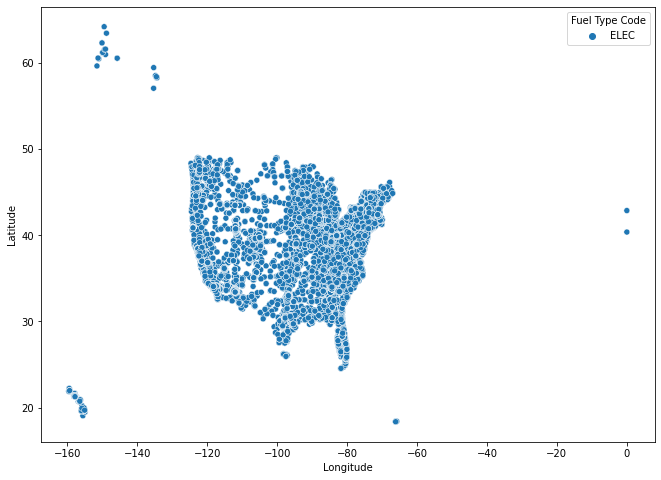

In [27]:
f, ax = plt.subplots(figsize=(11, 8))
sns.scatterplot(x="Longitude", y="Latitude",
                hue="Fuel Type Code", 
                palette="tab10",
                data=ev_21)
plt.show()

In [28]:
ev_21.head()

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Groups With Access Code,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Latitude,Longitude,ID,Updated At,Open Date,EV Connector Types,Country,Facility Type,EV Pricing
159,ELEC,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,Private,NaN,39.0,3.0,Non-Networked,34.248319,-118.387971,1517,2021-07-14 18:51:43 UTC,1999-10-15,CHADEMO J1772 J1772COMBO,US,UTILITY,NaN
160,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,Private,NaN,4.0,NaN,Non-Networked,34.052542,-118.448504,1519,2021-07-14 18:51:43 UTC,2020-02-28,J1772,US,UTILITY,Free
161,ELEC,Southern California Edison - Rosemead Office B...,2244 Walnut Grove Ave,Rosemead,CA,91770,TEMPORARILY UNAVAILABLE (Private),22.0,22.0,NaN,Greenlots,34.050745,-118.081014,1520,2021-03-11 23:22:17 UTC,2011-08-01,J1772 NEMA520,US,UTILITY,NaN
162,ELEC,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,Public,NaN,12.0,NaN,Non-Networked,34.040539,-118.271387,1523,2021-03-11 23:22:17 UTC,1995-08-30,J1772,US,PARKING_GARAGE,NaN
163,ELEC,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,Private,NaN,311.0,2.0,Non-Networked,34.059133,-118.248589,1525,2021-07-14 18:51:43 UTC,1999-10-15,CHADEMO J1772 J1772COMBO,US,UTILITY,NaN
